## Step 1: Data Import and Cleaning

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#load the dataset from the CSV file into a Pandas DataFrame.
df = pd.read_csv("starbucks_drinkMenu_expanded.csv")

# data cleaning

#we clean the data by removing any duplicate rows.
df = df.drop_duplicates()

#We print the data types of each column and the names of the columns.

print(df.dtypes)  # Print data types of each column
print(df.columns)  # Print column names

#We check for any null values in each column.
print(df.isnull().sum())  # Check for null values in each column

# Remove extra whitespace before and after column names
df.columns = df.columns.str.strip()

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object
Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calc

## Step 2: Data Analysis

### Data Exploration

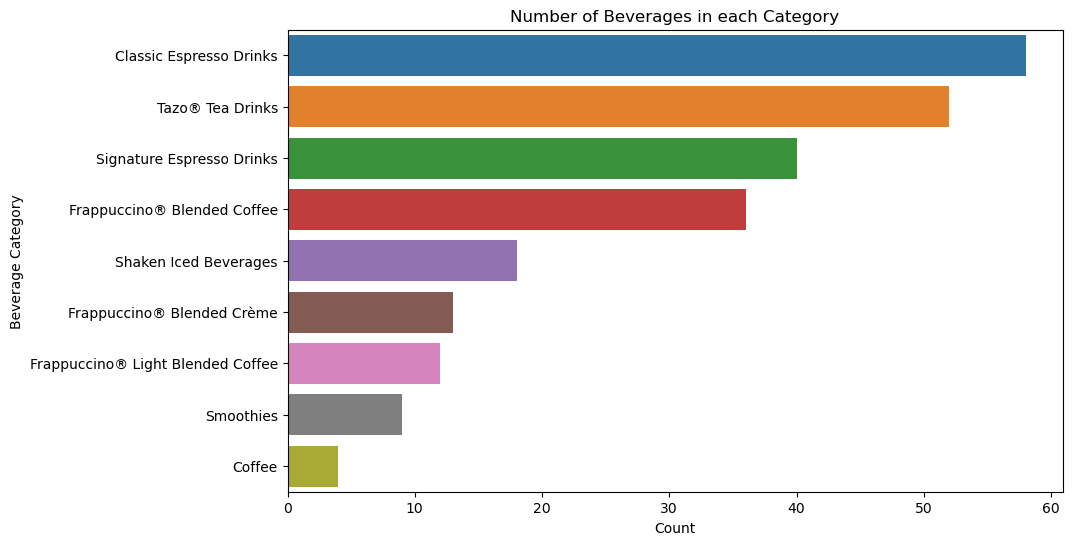

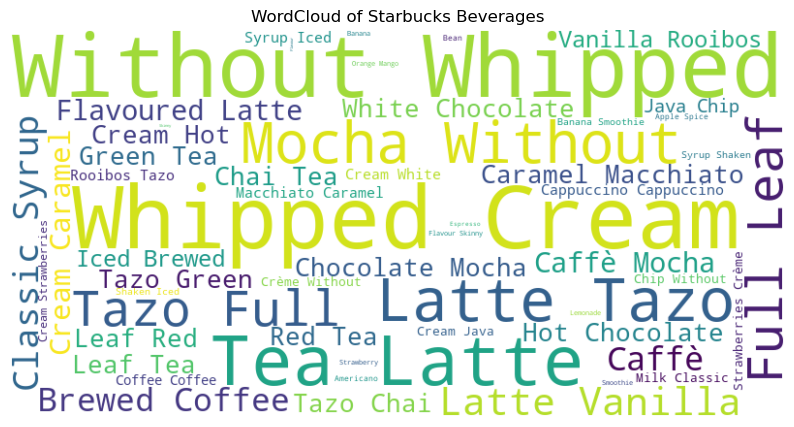

In [54]:
# Step 2: Data Exploration

# Plot Beverage_category
plt.figure(figsize=(10, 6))
sns.countplot(y='Beverage_category', data=df, order=df['Beverage_category'].value_counts().index)
plt.title('Number of Beverages in each Category')
plt.xlabel('Count')
plt.ylabel('Beverage Category')
plt.show()

# WordCloud
wordcloud_text = ' '.join(df['Beverage'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud of Starbucks Beverages')
plt.axis('off')
plt.show()


In [55]:
# Which Starbucks drink has the highest calories from the dataset?
highest_calorie_drink = df.loc[df['Calories'].idxmax()]
print("Drink with the highest calories:", highest_calorie_drink['Beverage'])

# Which drink has the highest calories from the Starbucks classic espresso drinks?
classic_espresso = df[df['Beverage_category'] == 'Classic Espresso Drinks']
highest_calorie_classic_espresso = classic_espresso.loc[classic_espresso['Calories'].idxmax()]['Beverage']
print("Highest calorie classic espresso drink:", highest_calorie_classic_espresso)

# Highest Sugar Drink at Starbucks?
highest_sugar_drink = df.loc[df['Sugars (g)'].idxmax()]
print("Drink with the highest sugar content:", highest_sugar_drink['Beverage'])

# Highest Sugar Drink from Signature Espresso Drinks?
signature_espresso = df[df['Beverage_category'] == 'Signature Espresso Drinks']
highest_sugar_signature_espresso = signature_espresso.loc[signature_espresso['Sugars (g)'].idxmax()]['Beverage']
print("Highest sugar signature espresso drink:", highest_sugar_signature_espresso)

# Which drink has the most calories from the Starbucks TazoÂ® Tea Drinks drinks?
tazo_tea_drinks = df[df['Beverage_category'] == 'Tazo® Tea Drinks']
highest_calorie_tazo_tea_drink = tazo_tea_drinks.loc[tazo_tea_drinks['Calories'].idxmax()]['Beverage']
print("Highest calorie Tazo tea drink:", highest_calorie_tazo_tea_drink)

Drink with the highest calories: White Chocolate Mocha (Without Whipped Cream)
Highest calorie classic espresso drink: Caffè Mocha (Without Whipped Cream)
Drink with the highest sugar content: Java Chip (Without Whipped Cream)
Highest sugar signature espresso drink: Caramel Apple Spice (Without Whipped Cream)
Highest calorie Tazo tea drink: Tazo® Green Tea Latte


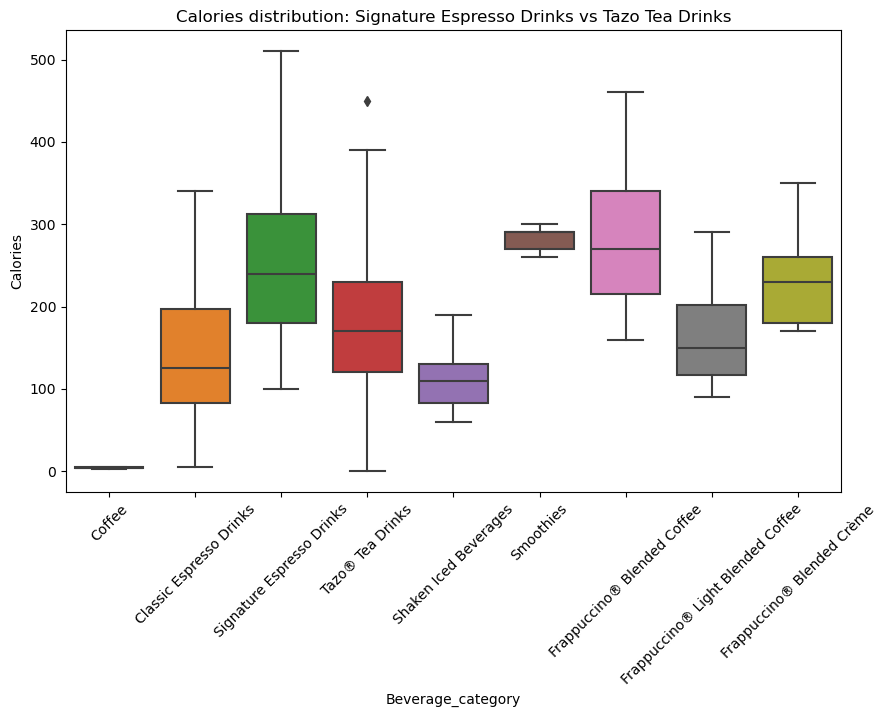

In [56]:
# Signature Espresso Drinks vs TazoÂ® Tea Drinks calories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Beverage_category', y='Calories', data=df)
plt.title('Calories distribution: Signature Espresso Drinks vs Tazo Tea Drinks')
plt.xticks(rotation=45)
plt.show()




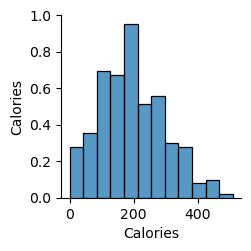

In [57]:
# explore caffine vs calories
sns.pairplot(df[['Calories', 'Caffeine (mg)']])

# Show pairplot
plt.show()

### Hypothesis: 
Starbucks beverages categorized as "Classic Espresso Drinks" will have higher average calories compared to beverages in other categories due to the rich and concentrated nature of espresso.

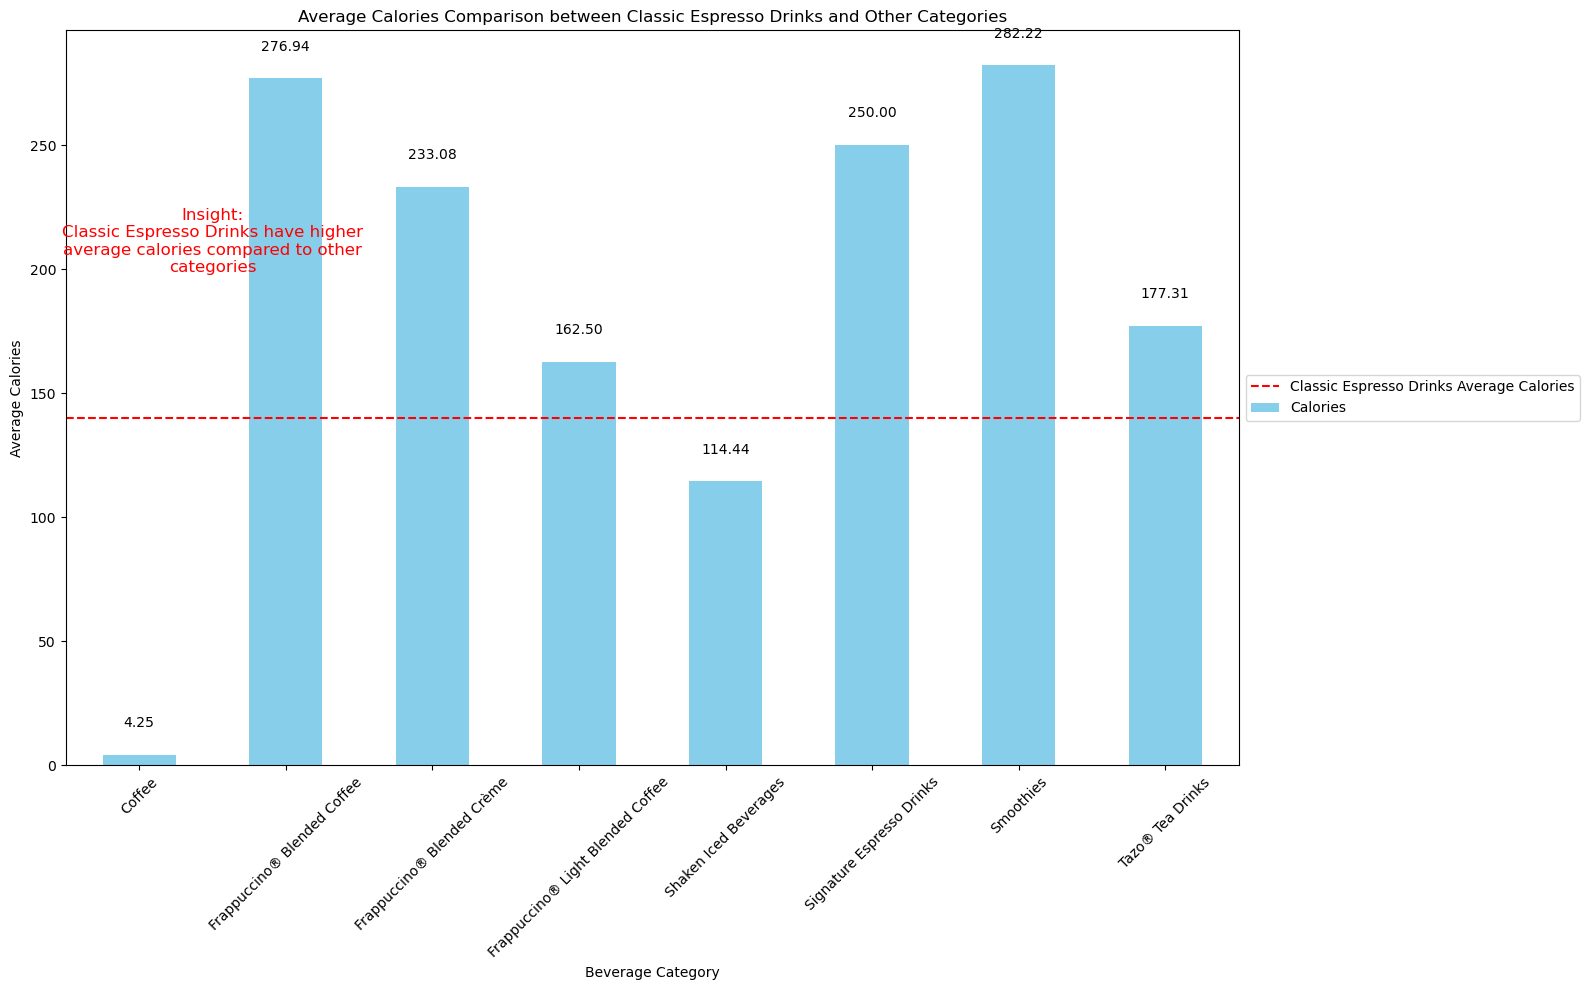

In [58]:
# Visualize comparison of average calories
plt.figure(figsize=(16, 10))  # Increase the plot area
avg_calories_other_categories.plot(kind='bar', color='skyblue')
plt.axhline(y=avg_calories_classic_espresso, color='red', linestyle='--', label='Classic Espresso Drinks Average Calories')
plt.title('Average Calories Comparison between Classic Espresso Drinks and Other Categories')
plt.xlabel('Beverage Category')
plt.ylabel('Average Calories')

# Set x-tick positions and labels
plt.xticks(range(len(avg_calories_other_categories.index)), avg_calories_other_categories.index, rotation=45)

# Add text to explain insights
plt.text(0.5, (avg_calories_classic_espresso + avg_calories_other_categories.max()) / 2, 
         'Insight:\nClassic Espresso Drinks have higher\naverage calories compared to other\ncategories', 
         color='red', ha='center', va='center', fontsize=12)

# Display average calories value on bars
for i, v in enumerate(avg_calories_other_categories.values):
    plt.text(i, v + 10, f'{v:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend on the right side

plt.tight_layout()  # Adjust layout to prevent clipping of x-labels
plt.show()


## Step 3: Conclusion

In [59]:
# Conclusion
if avg_calories_classic_espresso > avg_calories_other_categories.max():
    print("\nIn conclusion, the hypothesis is proved.")
    print("Classic Espresso Drinks have a higher average calorie content compared to beverages in other categories, supporting the hypothesis.")
else:
    print("\nIn conclusion, the hypothesis is not proved.")
    print("Although Classic Espresso Drinks have a relatively high average calorie content, it may not be significantly higher compared to beverages in other categories.")


In conclusion, the hypothesis is not proved.
Although Classic Espresso Drinks have a relatively high average calorie content, it may not be significantly higher compared to beverages in other categories.
